# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [206]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import time
from datetime import date
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [236]:
# List for holding lat_lngs and cities
# Create cities as a List of Dictionaries with key {city}, values: [lat, lng, country]
lat_lngs = []
only_cities = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1300)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1300)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_data.city_name
    country = city_data.country_code
      
# If the city is unique, then add it to a our cities list
    if city not in only_cities:
        only_cities.append(city)
        cities.append({city:[lat_lng[0],lat_lng[1],country]})

# Print the city count to confirm sufficient count
print(len(cities))
print(len(lats))

cities

555
1300


[{'victoria': [-5.987198815175802, 58.5405342890279, 'sc']},
 {'camocim': [-1.5383539286378465, -40.496904872929605, 'br']},
 {'rikitea': [-81.62300615011708, -130.13497843403553, 'pf']},
 {'mataura': [-37.39077646848581, -147.70617231630186, 'pf']},
 {'punta arenas': [-84.06662830481324, -90.68972088072292, 'cl']},
 {'zlitan': [32.192537069117066, 14.748213013346543, 'ly']},
 {'yelizovo': [52.560373982048475, 157.44134019742575, 'ru']},
 {'hermanus': [-57.042639989437895, 16.132720005628613, 'za']},
 {'saint-leu': [-24.430316831440436, 52.351540212549196, 're']},
 {'misratah': [33.798483963382466, 15.401228397342067, 'ly']},
 {'cidreira': [-47.349766866247684, -34.09145057241784, 'br']},
 {'mahibadhoo': [4.0676670461901665, 66.33658535436476, 'mv']},
 {'lagos': [5.565438532400407, 3.0067367184745706, 'ng']},
 {'port-gentil': [-2.9619173848934253, 1.542240077159505, 'ga']},
 {'kapaa': [17.156358226121256, -165.04505531739653, 'us']},
 {'rapina': [58.121664246995266, 27.48970898928539, 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [237]:
# Use Open Weather API to access weather data

# Get temperature in Fahrengeit
units="imperial"

# Specify the query url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Get All needed weather parameters for each city
print("Beginning Data Retrieval")
print("--------------------------------")

# Set data for loop - record counter and copy of cities list
cities_copy = [city for city in cities]
record_id=0

# Iterate through cities copy to get weather data for each city
for city in cities_copy:

    # Get Key from city Dictionary to get the city name    
    for key in city:
        
        try:
            print(f"Processing Record {record_id} | {key}")

            # Try all required responses first
            response = requests.get(url+key).json()
            temp = response["main"]["temp_max"]
            hum = response["main"]["humidity"]
            cld = response["clouds"]["all"]
            wind = response["wind"]["speed"]
            dt = response["dt"]

            # Add values to city dictionary     
            city[key].append(temp)
            city[key].append(hum)
            city[key].append(cld)
            city[key].append(wind)
            city[key].append(dt)
            
        # Catch exception if data for city is not foud in openweather API   
        except:
            
            print(f"City {key} not found. Skipping...")
            
            # Remove this city from cities list
            cities.remove(city)    
            
    record_id+=1
    
print("--------------------------------")        
print("Data Retrieval Complete")
print("--------------------------------")
print(len(cities))
cities

Beginning Data Retrieval
--------------------------------
Processing Record 0 | victoria
Processing Record 1 | camocim
Processing Record 2 | rikitea
Processing Record 3 | mataura
Processing Record 4 | punta arenas
Processing Record 5 | zlitan
Processing Record 6 | yelizovo
Processing Record 7 | hermanus
Processing Record 8 | saint-leu
Processing Record 9 | misratah
Processing Record 10 | cidreira
Processing Record 11 | mahibadhoo
Processing Record 12 | lagos
Processing Record 13 | port-gentil
Processing Record 14 | kapaa
Processing Record 15 | rapina
Processing Record 16 | airai
Processing Record 17 | bad wurzach
Processing Record 18 | illoqqortoormiut
City illoqqortoormiut not found. Skipping...
Processing Record 19 | pocone
Processing Record 20 | havre-saint-pierre
Processing Record 21 | atasu
Processing Record 22 | ulladulla
Processing Record 23 | canico
Processing Record 24 | ampanihy
Processing Record 25 | helong
Processing Record 26 | taolanaro
City taolanaro not found. Skipping.

Processing Record 227 | severo-kurilsk
Processing Record 228 | los lunas
Processing Record 229 | anthia
City anthia not found. Skipping...
Processing Record 230 | polunochnoye
Processing Record 231 | omboue
Processing Record 232 | moram
Processing Record 233 | yevlax
Processing Record 234 | kushiro
Processing Record 235 | lasa
Processing Record 236 | mar del plata
Processing Record 237 | goderich
Processing Record 238 | barcelos
Processing Record 239 | kapit
Processing Record 240 | lannion
Processing Record 241 | pachino
Processing Record 242 | cherskiy
Processing Record 243 | buraydah
Processing Record 244 | uruzgan
Processing Record 245 | port blair
Processing Record 246 | bahia blanca
Processing Record 247 | port angeles
Processing Record 248 | saint george
Processing Record 249 | lisakovsk
Processing Record 250 | beloha
Processing Record 251 | burnie
Processing Record 252 | mufumbwe
Processing Record 253 | lebu
Processing Record 254 | provideniya
Processing Record 255 | sistranda
P

Processing Record 455 | kidal
Processing Record 456 | kosh-agach
Processing Record 457 | saint-joseph
Processing Record 458 | cap malheureux
Processing Record 459 | nanakuli
Processing Record 460 | athens
Processing Record 461 | jalna
Processing Record 462 | saleaula
City saleaula not found. Skipping...
Processing Record 463 | awjilah
Processing Record 464 | cotonou
Processing Record 465 | sitrah
Processing Record 466 | flin flon
Processing Record 467 | lixourion
Processing Record 468 | dillon
Processing Record 469 | praia da vitoria
Processing Record 470 | santa ana
Processing Record 471 | anadyr
Processing Record 472 | beyneu
Processing Record 473 | conceicao do araguaia
Processing Record 474 | farah
Processing Record 475 | thunder bay
Processing Record 476 | huron
Processing Record 477 | saint-pierre
Processing Record 478 | tateyama
Processing Record 479 | kaduna
Processing Record 480 | tabou
Processing Record 481 | vangaindrano
Processing Record 482 | klintsy
Processing Record 483 

[{'victoria': [-5.987198815175802,
   58.5405342890279,
   'sc',
   91.45,
   71,
   38,
   7,
   1627197724]},
 {'camocim': [-1.5383539286378465,
   -40.496904872929605,
   'br',
   73.15,
   83,
   11,
   11.56,
   1627197619]},
 {'rikitea': [-81.62300615011708,
   -130.13497843403553,
   'pf',
   70.27,
   59,
   0,
   2.35,
   1627197724]},
 {'mataura': [-37.39077646848581,
   -147.70617231630186,
   'pf',
   44.96,
   83,
   100,
   6.08,
   1627197725]},
 {'punta arenas': [-84.06662830481324,
   -90.68972088072292,
   'cl',
   35.71,
   87,
   75,
   6.91,
   1627197725]},
 {'zlitan': [32.192537069117066,
   14.748213013346543,
   'ly',
   82.89,
   47,
   0,
   10.47,
   1627197726]},
 {'yelizovo': [52.560373982048475,
   157.44134019742575,
   'ru',
   64.54,
   77,
   20,
   11.18,
   1627197726]},
 {'hermanus': [-57.042639989437895,
   16.132720005628613,
   'za',
   55.9,
   47,
   99,
   6.85,
   1627197726]},
 {'saint-leu': [-24.430316831440436,
   52.351540212549196,
   '

In [73]:
# Test cell
response = requests.get(url+'casa nova').json()
response

{'coord': {'lon': -41.1333, 'lat': -9.4167},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 84.18,
  'feels_like': 86.04,
  'temp_min': 84.18,
  'temp_max': 84.18,
  'pressure': 1017,
  'humidity': 53,
  'sea_level': 1017,
  'grnd_level': 974},
 'visibility': 10000,
 'wind': {'speed': 23.2, 'deg': 146, 'gust': 23.96},
 'clouds': {'all': 76},
 'dt': 1627064473,
 'sys': {'type': 1,
  'id': 8418,
  'country': 'BR',
  'sunrise': 1627030867,
  'sunset': 1627072835},
 'timezone': -10800,
 'id': 3402621,
 'name': 'Casa Nova',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [256]:
# Export Data to csv
# output_path = os.path.join("Output", "city_weather.csv")

# with open(output_path, 'w') as csvfile:

#     # Initialize csv.writer
#     csv_writer = csv.writer(csvfile, delimiter=',')
    
#     csv_writer.writerow(
#         ["City ID", "City", "Lat", "Lang", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
    
# both following writer write in one column   
# 1------
# for i in range(len(cities)):
#         csv_writer.writerow([i, cities[i]])
        
# 2 -----------
#     for i in range(len(cities)):
#         values=[]
#         for key in cities[i]:
#             values.append(key)
# #             print(cities[i])
# #             print(key)
#             for value in cities[i][key]:
#                 values.append(value)
# #                 print(value)
# #                 print(row)
#         csv_writer.writerow([i, values])
        
     
# # Create an empty DataFrame with required columns
city_weather = pd.DataFrame(
    columns=["Lat", "Lang", "Country", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])

# Add data for each city into DataFrame via df.append()
for city in cities:
    
    # Create DataFrame from city Dictionary with orient=index to have key as an index     
    city_df = pd.DataFrame.from_dict(
        city,
        orient = 'index',
        columns=["Lat", "Lang", "Country", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])
  
    city_weather = city_weather.append(city_df)

city_weather.index.name = "City"

city_weather.to_csv("Output/city_weather.csv")

city_weather

,Lat,Lang,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
victoria,-5.987199,58.540534,sc,91.45,71,38,7,1627197724
camocim,-1.538354,-40.496905,br,73.15,83,11,11.56,1627197619
rikitea,-81.623006,-130.134978,pf,70.27,59,0,2.35,1627197724
mataura,-37.390776,-147.706172,pf,44.96,83,100,6.08,1627197725
punta arenas,-84.066628,-90.689721,cl,35.71,87,75,6.91,1627197725
...,...,...,...,...,...,...,...,...
luderitz,-33.700949,4.993538,na,66.81,19,17,19.75,1627197963
alghero,39.962626,7.002884,it,91.99,78,40,1.14,1627197963
bonthe,1.295106,-18.133278,sl,76.05,85,100,5.93,1627197964


In [257]:
len(city_weather)

513

In [259]:
# convert to float
city_weather["Humidity"] = city_weather["Humidity"].astype(float)
city_weather["Cloudiness"] = city_weather["Cloudiness"].astype(float)
city_weather["Wind Speed"] = city_weather["Wind Speed"].astype(float)

# Add statistics
city_weather.describe()

,Lat,Lang,Max Temp,Humidity,Cloudiness,Wind Speed
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,19.349049,22.540680,70.539552,67.727096,56.653021,8.145556
std,36.902224,89.884443,14.303818,22.210103,40.574445,5.586518
min,-87.414977,-170.872621,32.050000,8.000000,0.000000,0.000000
25%,-6.562669,-51.645660,60.440000,52.000000,12.000000,3.690000
50%,23.134110,26.650224,72.910000,72.000000,75.000000,6.910000
75%,49.093754,96.847874,81.090000,86.000000,99.000000,11.540000
max,89.459717,179.313403,112.480000,100.000000,100.000000,37.850000


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [263]:
hum_df = pd.DataFrame(city_weather)

# insert humidity > 100 to test
# hum_df.iloc[5,4]=110
# hum_df.iloc[2,4]=120
# hum_df.iloc[28,4]=101
# hum_df.iloc[0,4]=103
# hum_df

In [264]:
# check humidity
humidity_is_greater_100 = False

indices = []
for index, row in hum_df.iterrows():
    if hum_df.loc[index,"Humidity"]>100:
        indices.append(index)
        humidity_is_greater_100 = True
indices

[]

In [267]:
if humidity_is_greater_100:
    clean_df = hum_df.drop(indices, inplace = False)
else:
    clean_df = pd.DataFrame(city_weather)
clean_df

,Lat,Lang,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
victoria,-5.987199,58.540534,sc,91.45,71.0,38.0,7.00,1627197724
camocim,-1.538354,-40.496905,br,73.15,83.0,11.0,11.56,1627197619
rikitea,-81.623006,-130.134978,pf,70.27,59.0,0.0,2.35,1627197724
mataura,-37.390776,-147.706172,pf,44.96,83.0,100.0,6.08,1627197725
punta arenas,-84.066628,-90.689721,cl,35.71,87.0,75.0,6.91,1627197725
...,...,...,...,...,...,...,...,...
luderitz,-33.700949,4.993538,na,66.81,19.0,17.0,19.75,1627197963
alghero,39.962626,7.002884,it,91.99,78.0,40.0,1.14,1627197963
bonthe,1.295106,-18.133278,sl,76.05,85.0,100.0,5.93,1627197964


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [306]:
# Get the date of analysis
analysis_date = date.today()

# Define function to adjust y_labels
def label(y_label):
    switch = {
        "Max Temperature": "Max Temperature (F)",
        "Humidity": "Humidity (%)",
        "Cloudiness": "Cloudiness (%)",
        "Wind Speed": "Wind Speed (mph)"
    }
    return switch.get(y_label)

# Define function to build a scatter plot and to save to .png file
def scatter(y_value, y_label):
    ax = clean_df.plot(kind = "scatter", x = "Lat", y = y_value,
              title = f"City Latitude vs. {y_label} ({analysis_date})",
                      marker = "o", s=35, facecolor="teal", edgecolor = "black", grid = True)
    ax.set_xlabel("Latitude")
    y_label
    ax.set_ylabel(label(y_label))
    fig = ax.get_figure()
    fig.savefig(f"Output/Lat_{y_label}.png")

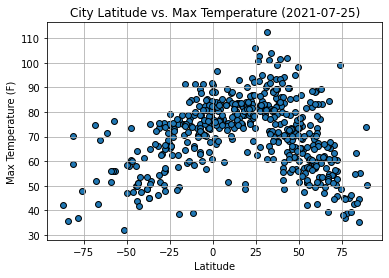

In [313]:
scatter("Max Temp", "Max Temperature")

#### Latitude vs. Temperature Plot shows that the closer city is to the Equator (zero latitude) the higher the Max Temperature is.

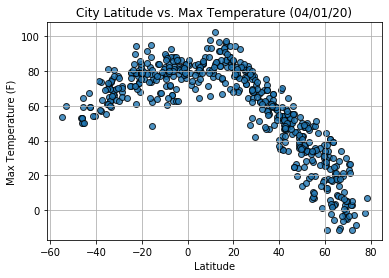

## Latitude vs. Humidity Plot

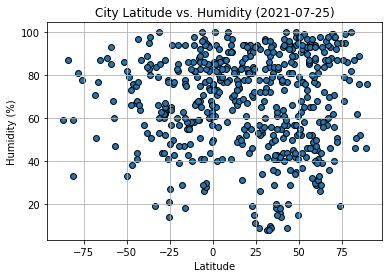

In [312]:
scatter("Humidity", "Humidity")

#### Latitude vs. Humidity Plot shows that the closer city is to the Equator (zero latitude) the lower the Humidity is.

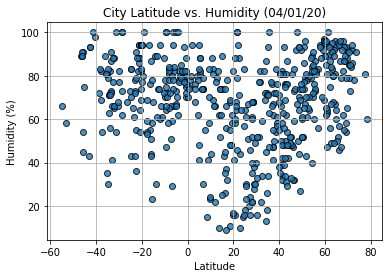

## Latitude vs. Cloudiness Plot

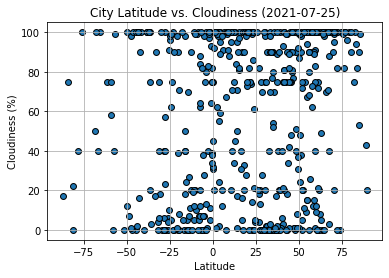

In [311]:
scatter("Cloudiness","Cloudiness")

#### Latitude vs. Cloudiness Plot shows that the ?

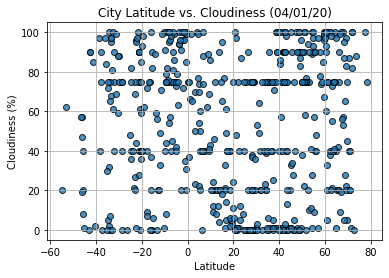

## Latitude vs. Wind Speed Plot

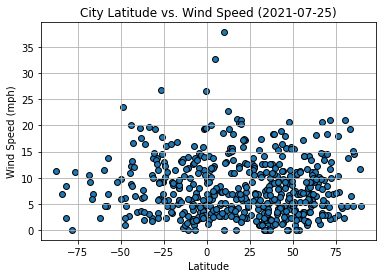

In [310]:
scatter("Wind Speed", "Wind Speed")

#### Latitude vs. Wind Speed Plot shows that cities in the Southern Hemisphere have higher measurements of Wind Speed.

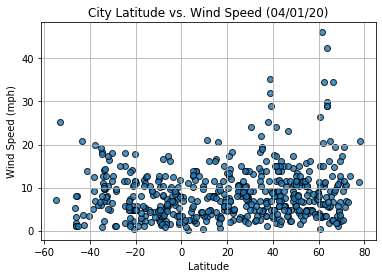

## Linear Regression

In [314]:
# Add function that calculates linear regreassion

# Calculate correlation usong scipy pearsonr method
def correlation(var1, var2):
    r_value = st.pearsonr(var1, var2)
    print(f"The r-value is {round(r_value[0],2)}")
    return r_value

# Calculate linear regression equation
def regression(var1, var2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(var1, var2)
    regress_values = var1 * slope + intercept
    return regress_values

def scatter_plot(dataFrame, x_value, y_value, regrX_values, regrY_values, x_label, y_label):
    plot = dataFrame.plot.scatter(x = x_value, y = y_value, s=40)
    plot.set_title(f"Linear Regression Model btw {y_label} and {x_label}")
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plt.plot(regrX_values,regrY_values,"r-")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.57


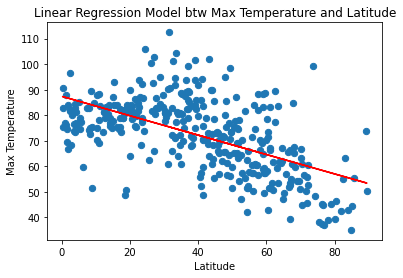

In [331]:
north_hem = clean_df.loc[clean_df["Lat"]>=0]

north_lat = north_hem["Lat"]
north_max_temp = north_hem["Max Temp"]

correlation(north_lat, north_max_temp)

scatter_plot(north_hem, "Lat", "Max Temp", north_lat,
             regression(north_lat, north_max_temp), "Latitude", "Max Temperature")

* There is a strong negative correlation between Max Temp and Latitude in Northern Hemisphere.
* That means that the more to the North the city is the less Max Temp it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.62


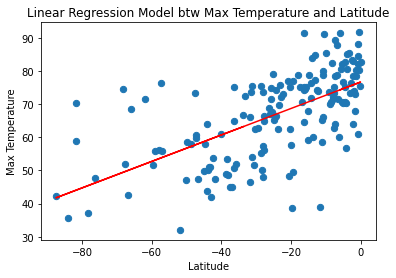

In [330]:
south_hem = clean_df.loc[clean_df["Lat"]<=0]

south_lat = south_hem["Lat"]
south_max_temp = south_hem["Max Temp"]

correlation(south_lat, south_max_temp)

scatter_plot(south_hem, "Lat", "Max Temp", south_lat,
             regression(south_lat, south_max_temp), "Latitude", "Max Temperature")

There is a strong positive correlation between Max Temp and Latitude in Southern Hemisphere.
That means that the more to the South the city is the greater Max Temp gets

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.04


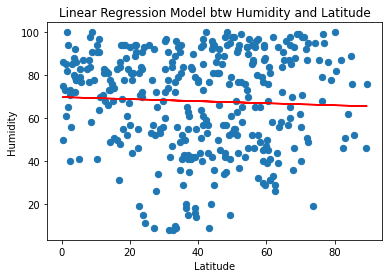

In [329]:
north_humidity = north_hem["Humidity"]

correlation(north_lat, north_humidity)

scatter_plot(north_hem, "Lat", "Humidity", north_lat,
             regression(north_lat, north_humidity), "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.0


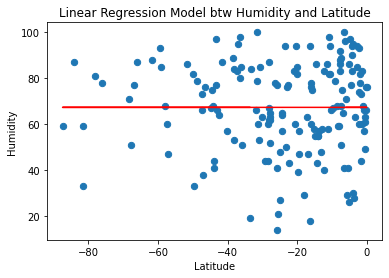

In [328]:
south_humidity = south_hem["Humidity"]

correlation(south_lat, south_humidity)

scatter_plot(south_hem, "Lat", "Humidity", south_lat,
             regression(south_lat, south_humidity), "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.05


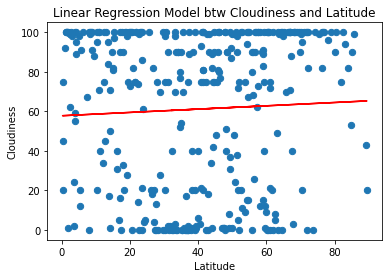

In [326]:
north_cloud = north_hem["Cloudiness"]

correlation(north_lat, north_cloud)

scatter_plot(north_hem, "Lat", "Cloudiness", north_lat,
             regression(north_lat, north_cloud), "Latitude", "Cloudiness")

The r-value is: 0.0020898727664228514


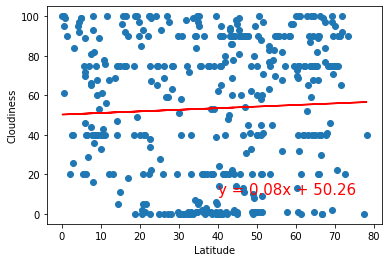

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.06


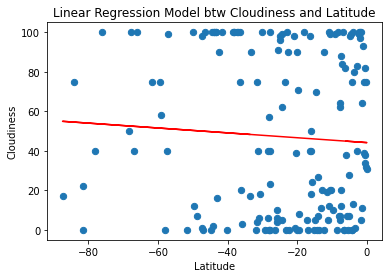

In [325]:
south_cloud = south_hem["Cloudiness"]

correlation(south_lat, south_cloud)

scatter_plot(south_hem, "Lat", "Cloudiness", south_lat,
             regression(south_lat, south_cloud), "Latitude", "Cloudiness")

The r-value is: 0.0035263772085582894


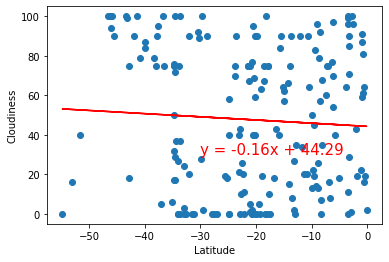

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.04


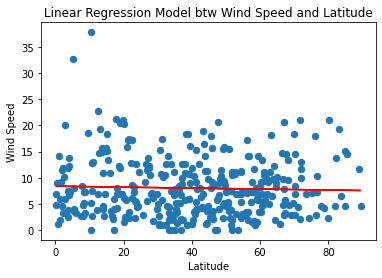

In [324]:
north_wind = north_hem["Wind Speed"]

correlation(north_lat, north_wind)

scatter_plot(north_hem, "Lat", "Wind Speed", north_lat,
             regression(north_lat, north_wind), "Latitude", "Wind Speed")

The r-value is: 0.04019723576144484


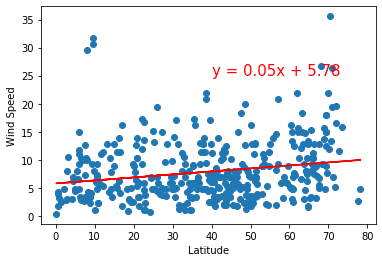

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.03


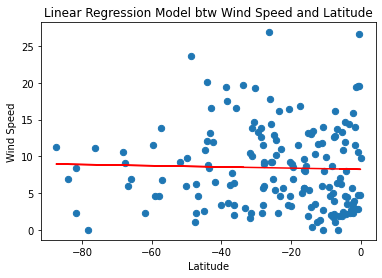

In [323]:
south_wind = south_hem["Wind Speed"]

correlation(south_lat, south_wind)

scatter_plot(south_hem, "Lat", "Wind Speed", south_lat,
             regression(south_lat, south_wind), "Latitude", "Wind Speed")

The r-value is: 0.017128274759839232


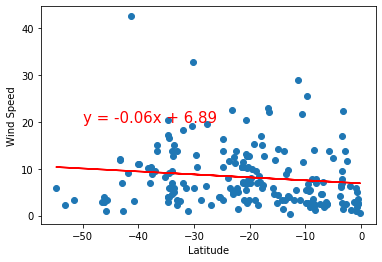